In [2]:
import pandas as pd
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Entropy/CSV/Gray.csv',index_col=0)
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.837496,0.804884,0.694754,0.589248,0.553841,0.488336,0.479846,0.475680,0.449786,0.442280,...,0.652707,0.718388,0.768566,0.950411,0.796984,0.582206,0.525445,0.584897,0.688710,0
1,0.853356,0.701616,0.622520,0.596695,0.572790,0.581854,0.542538,0.505265,0.582676,0.594674,...,0.823329,0.734343,0.623506,0.785815,0.982154,0.754361,0.674094,0.669100,0.676406,0
2,1.894732,1.719272,1.599109,1.695362,1.768130,1.618208,1.629891,1.652598,1.667379,1.837525,...,1.744755,1.765632,1.989923,1.960546,1.974459,1.815624,1.712046,1.693183,1.916792,0
3,0.834748,0.863627,1.048542,1.211608,0.989584,1.078015,1.176071,1.007625,1.029429,1.193712,...,0.010256,0.010256,0.010256,0.006706,0.098830,0.072594,0.019535,0.022793,0.023419,0
4,1.628894,1.385916,1.244579,1.119788,1.341178,1.461674,1.347787,1.686546,1.538704,1.465947,...,1.843316,1.598068,1.617885,1.854822,1.164702,1.196274,1.517541,1.126891,1.075529,0


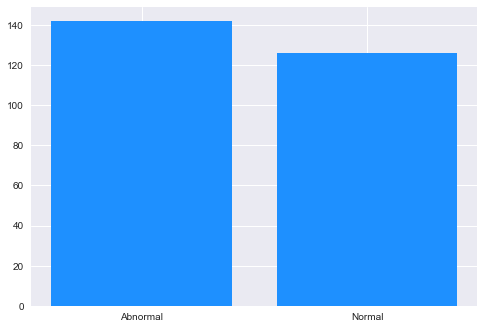

In [26]:

import warnings
warnings.filterwarnings("ignore")
 
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
from sklearn import metrics
num_normal = np.sum(d['Class'] == 0)
num_abnormal = np.sum(d['Class'] == 1)
plt.bar(['Abnormal', 'Normal'], [num_abnormal, num_normal], color='dodgerblue')
plt.show()

In [4]:
# 提取负样本，并且按照8:2切成训练集和测试集
data = d
mask = (data['Class'] == 0)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
#display(X_train.drop(['Class'],axis=1))
# X_train = X_train.drop(['Class'], axis=1).values
# X_test = X_test.drop(['Class'], axis=1).values


X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)

# X_train=X_train.iloc[:,118:].values
# X_test=X_test.iloc[:,118:].values
# 提取所有正样本，作为测试集的一部分
#X_fraud = data[~mask].drop(['Class'], axis=1).values
X_fraud = data[~mask].drop(['Class'], axis=1)
# X_fraud=X_fraud.iloc[:,118:].values



In [17]:

# 设置Autoencoder的参数
# 隐藏层节点数分别为16，8，8，16
# epoch为50，batch size为32
input_dim = X_train.shape[1]
encoding_dim = 4
num_epoch = 2000
batch_size = 64

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])

# 模型保存为SofaSofa_model.h5，并开始训练模型
checkpointer = ModelCheckpoint(filepath="SofaSofa_model.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1, 
                          callbacks=[checkpointer]).history



Epoch 1/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.6879 - mae: 0.6870 - val_loss: 1.4601 - val_mae: 0.9145
Epoch 2/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.6836 - mae: 0.6838 - val_loss: 1.4546 - val_mae: 0.9114
Epoch 3/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.6792 - mae: 0.6805 - val_loss: 1.4481 - val_mae: 0.9079
Epoch 4/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.6742 - mae: 0.6767 - val_loss: 1.4409 - val_mae: 0.9038
Epoch 5/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.6684 - mae: 0.6727 - val_loss: 1.4334 - val_mae: 0.8996
Epoch 6/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.6622 - mae: 0.6682 - val_loss: 1.4258 - val_mae: 0.8952
Epoch 7/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.6552 - mae: 0.6635 - val_loss: 1.4158 - val_mae: 0.8902
Epoch 8/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.6483 - m

Epoch 125/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.2887 - mae: 0.3868 - val_loss: 0.8062 - val_mae: 0.5749
Epoch 126/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2881 - mae: 0.3864 - val_loss: 0.8047 - val_mae: 0.5743
Epoch 127/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2874 - mae: 0.3859 - val_loss: 0.8032 - val_mae: 0.5737
Epoch 128/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2868 - mae: 0.3853 - val_loss: 0.8017 - val_mae: 0.5730
Epoch 129/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2862 - mae: 0.3848 - val_loss: 0.8002 - val_mae: 0.5724
Epoch 130/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2856 - mae: 0.3842 - val_loss: 0.7988 - val_mae: 0.5717
Epoch 131/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2850 - mae: 0.3838 - val_loss: 0.7973 - val_mae: 0.5710
Epoch 132/2000
2/2 [==============================] - 0s 21ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 0.2567 - mae: 0.3534 - val_loss: 0.7273 - val_mae: 0.5355
Epoch 187/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2563 - mae: 0.3529 - val_loss: 0.7261 - val_mae: 0.5349
Epoch 188/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2559 - mae: 0.3525 - val_loss: 0.7250 - val_mae: 0.5344
Epoch 189/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2554 - mae: 0.3520 - val_loss: 0.7239 - val_mae: 0.5338
Epoch 190/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2550 - mae: 0.3515 - val_loss: 0.7228 - val_mae: 0.5332
Epoch 191/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2546 - mae: 0.3510 - val_loss: 0.7217 - val_mae: 0.5326
Epoch 192/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.2542 - mae: 0.3505 - val_loss: 0.7206 - val_mae: 0.5321
Epoch 193/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.2538 - 

Epoch 248/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2357 - mae: 0.3273 - val_loss: 0.6664 - val_mae: 0.5023
Epoch 249/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2355 - mae: 0.3270 - val_loss: 0.6656 - val_mae: 0.5019
Epoch 250/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2352 - mae: 0.3266 - val_loss: 0.6649 - val_mae: 0.5015
Epoch 251/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2350 - mae: 0.3262 - val_loss: 0.6642 - val_mae: 0.5010
Epoch 252/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.2348 - mae: 0.3259 - val_loss: 0.6634 - val_mae: 0.5006
Epoch 253/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.2345 - mae: 0.3255 - val_loss: 0.6626 - val_mae: 0.5002
Epoch 254/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.2343 - mae: 0.3253 - val_loss: 0.6618 - val_mae: 0.4999
Epoch 255/2000
2/2 [==============================] - 0s 22ms/step - 

Epoch 371/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1981 - mae: 0.2878 - val_loss: 0.5655 - val_mae: 0.4471
Epoch 372/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1980 - mae: 0.2877 - val_loss: 0.5650 - val_mae: 0.4467
Epoch 373/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1979 - mae: 0.2875 - val_loss: 0.5646 - val_mae: 0.4466
Epoch 374/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1978 - mae: 0.2874 - val_loss: 0.5641 - val_mae: 0.4462
Epoch 375/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1977 - mae: 0.2872 - val_loss: 0.5637 - val_mae: 0.4459
Epoch 376/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.1976 - mae: 0.2869 - val_loss: 0.5633 - val_mae: 0.4455
Epoch 377/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.1975 - mae: 0.2867 - val_loss: 0.5629 - val_mae: 0.4452
Epoch 378/2000
2/2 [==============================] - 0s 25ms/step - 

Epoch 494/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1902 - mae: 0.2776 - val_loss: 0.5258 - val_mae: 0.4265
Epoch 495/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1901 - mae: 0.2776 - val_loss: 0.5256 - val_mae: 0.4263
Epoch 496/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1901 - mae: 0.2775 - val_loss: 0.5254 - val_mae: 0.4260
Epoch 497/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1901 - mae: 0.2773 - val_loss: 0.5251 - val_mae: 0.4258
Epoch 498/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1900 - mae: 0.2771 - val_loss: 0.5249 - val_mae: 0.4258
Epoch 499/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1900 - mae: 0.2772 - val_loss: 0.5247 - val_mae: 0.4259
Epoch 500/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1899 - mae: 0.2773 - val_loss: 0.5246 - val_mae: 0.4261
Epoch 501/2000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 20ms/step - loss: 0.1271 - mae: 0.2275 - val_loss: 0.3954 - val_mae: 0.3640
Epoch 617/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1267 - mae: 0.2271 - val_loss: 0.3948 - val_mae: 0.3637
Epoch 618/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1264 - mae: 0.2268 - val_loss: 0.3942 - val_mae: 0.3635
Epoch 619/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1260 - mae: 0.2267 - val_loss: 0.3936 - val_mae: 0.3632
Epoch 620/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1256 - mae: 0.2264 - val_loss: 0.3929 - val_mae: 0.3627
Epoch 621/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1252 - mae: 0.2260 - val_loss: 0.3923 - val_mae: 0.3622
Epoch 622/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1247 - mae: 0.2255 - val_loss: 0.3916 - val_mae: 0.3618
Epoch 623/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1243 - 

Epoch 678/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0841 - mae: 0.1947 - val_loss: 0.3247 - val_mae: 0.3264
Epoch 679/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0833 - mae: 0.1940 - val_loss: 0.3234 - val_mae: 0.3254
Epoch 680/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0826 - mae: 0.1930 - val_loss: 0.3221 - val_mae: 0.3248
Epoch 681/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0820 - mae: 0.1926 - val_loss: 0.3209 - val_mae: 0.3245
Epoch 682/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0813 - mae: 0.1924 - val_loss: 0.3198 - val_mae: 0.3240
Epoch 683/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0807 - mae: 0.1919 - val_loss: 0.3187 - val_mae: 0.3234
Epoch 684/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0802 - mae: 0.1913 - val_loss: 0.3177 - val_mae: 0.3229
Epoch 685/2000
2/2 [==============================] - 0s 20ms/step - 

Epoch 801/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0653 - mae: 0.1731 - val_loss: 0.2766 - val_mae: 0.3030
Epoch 802/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0653 - mae: 0.1729 - val_loss: 0.2764 - val_mae: 0.3029
Epoch 803/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0652 - mae: 0.1728 - val_loss: 0.2762 - val_mae: 0.3031
Epoch 804/2000
2/2 [==============================] - 0s 18ms/step - loss: 0.0651 - mae: 0.1731 - val_loss: 0.2761 - val_mae: 0.3030
Epoch 805/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0651 - mae: 0.1731 - val_loss: 0.2758 - val_mae: 0.3027
Epoch 806/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0651 - mae: 0.1729 - val_loss: 0.2756 - val_mae: 0.3025
Epoch 807/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0650 - mae: 0.1726 - val_loss: 0.2754 - val_mae: 0.3025
Epoch 808/2000
2/2 [==============================] - ETA: 0s - loss:

2/2 [==============================] - 0s 19ms/step - loss: 0.0603 - mae: 0.1643 - val_loss: 0.2567 - val_mae: 0.2897
Epoch 924/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0603 - mae: 0.1641 - val_loss: 0.2565 - val_mae: 0.2895
Epoch 925/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0603 - mae: 0.1640 - val_loss: 0.2563 - val_mae: 0.2896
Epoch 926/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0602 - mae: 0.1644 - val_loss: 0.2562 - val_mae: 0.2899
Epoch 927/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0602 - mae: 0.1644 - val_loss: 0.2561 - val_mae: 0.2893
Epoch 928/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0602 - mae: 0.1639 - val_loss: 0.2561 - val_mae: 0.2890
Epoch 929/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0602 - mae: 0.1637 - val_loss: 0.2558 - val_mae: 0.2892
Epoch 930/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0601 - 

2/2 [==============================] - 0s 9ms/step - loss: 0.0570 - mae: 0.1583 - val_loss: 0.2455 - val_mae: 0.2824
Epoch 1046/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0570 - mae: 0.1580 - val_loss: 0.2453 - val_mae: 0.2827
Epoch 1047/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0569 - mae: 0.1582 - val_loss: 0.2452 - val_mae: 0.2828
Epoch 1048/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0569 - mae: 0.1585 - val_loss: 0.2451 - val_mae: 0.2825
Epoch 1049/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0569 - mae: 0.1581 - val_loss: 0.2451 - val_mae: 0.2821
Epoch 1050/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0569 - mae: 0.1578 - val_loss: 0.2449 - val_mae: 0.2823
Epoch 1051/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0569 - mae: 0.1582 - val_loss: 0.2448 - val_mae: 0.2824
Epoch 1052/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.056

2/2 [==============================] - 0s 9ms/step - loss: 0.0550 - mae: 0.1561 - val_loss: 0.2351 - val_mae: 0.2753
Epoch 1168/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0549 - mae: 0.1548 - val_loss: 0.2354 - val_mae: 0.2749
Epoch 1169/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0550 - mae: 0.1547 - val_loss: 0.2347 - val_mae: 0.2752
Epoch 1170/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0549 - mae: 0.1555 - val_loss: 0.2345 - val_mae: 0.2755
Epoch 1171/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0549 - mae: 0.1555 - val_loss: 0.2351 - val_mae: 0.2752
Epoch 1172/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0549 - mae: 0.1547 - val_loss: 0.2354 - val_mae: 0.2752
Epoch 1173/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0549 - mae: 0.1548 - val_loss: 0.2348 - val_mae: 0.2754
Epoch 1174/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0549 

2/2 [==============================] - 0s 9ms/step - loss: 0.0536 - mae: 0.1531 - val_loss: 0.2268 - val_mae: 0.2695
Epoch 1290/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0536 - mae: 0.1531 - val_loss: 0.2266 - val_mae: 0.2693
Epoch 1291/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0535 - mae: 0.1531 - val_loss: 0.2264 - val_mae: 0.2693
Epoch 1292/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0535 - mae: 0.1531 - val_loss: 0.2264 - val_mae: 0.2692
Epoch 1293/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0535 - mae: 0.1531 - val_loss: 0.2264 - val_mae: 0.2691
Epoch 1294/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0535 - mae: 0.1530 - val_loss: 0.2263 - val_mae: 0.2690
Epoch 1295/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0535 - mae: 0.1530 - val_loss: 0.2260 - val_mae: 0.2689
Epoch 1296/2000
2/2 [==============================] - 0s 8ms/step - loss: 0.05

2/2 [==============================] - 0s 20ms/step - loss: 0.0526 - mae: 0.1519 - val_loss: 0.2182 - val_mae: 0.2637
Epoch 1412/2000
2/2 [==============================] - 0s 8ms/step - loss: 0.0526 - mae: 0.1521 - val_loss: 0.2188 - val_mae: 0.2637
Epoch 1413/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0526 - mae: 0.1515 - val_loss: 0.2190 - val_mae: 0.2636
Epoch 1414/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0526 - mae: 0.1516 - val_loss: 0.2182 - val_mae: 0.2636
Epoch 1415/2000
2/2 [==============================] - ETA: 0s - loss: 0.0479 - mae: 0.147 - 0s 8ms/step - loss: 0.0526 - mae: 0.1522 - val_loss: 0.2183 - val_mae: 0.2635
Epoch 1416/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0525 - mae: 0.1518 - val_loss: 0.2190 - val_mae: 0.2637
Epoch 1417/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0526 - mae: 0.1514 - val_loss: 0.2183 - val_mae: 0.2635
Epoch 1418/2000
2/2 [========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0518 - mae: 0.1507 - val_loss: 0.2120 - val_mae: 0.2593
Epoch 1534/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0518 - mae: 0.1508 - val_loss: 0.2118 - val_mae: 0.2593
Epoch 1535/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0518 - mae: 0.1509 - val_loss: 0.2119 - val_mae: 0.2593
Epoch 1536/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0518 - mae: 0.1509 - val_loss: 0.2121 - val_mae: 0.2593
Epoch 1537/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0518 - mae: 0.1507 - val_loss: 0.2123 - val_mae: 0.2593
Epoch 1538/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0518 - mae: 0.1507 - val_loss: 0.2115 - val_mae: 0.2592
Epoch 1539/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0518 - mae: 0.1511 - val_loss: 0.2116 - val_mae: 0.2590
Epoch 1540/2000
2/2 [==============================] - 0s 8ms/step - loss: 0.0518 -

2/2 [==============================] - 0s 9ms/step - loss: 0.0513 - mae: 0.1506 - val_loss: 0.2054 - val_mae: 0.2551
Epoch 1656/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0512 - mae: 0.1502 - val_loss: 0.2062 - val_mae: 0.2551
Epoch 1657/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0512 - mae: 0.1498 - val_loss: 0.2054 - val_mae: 0.2550
Epoch 1658/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0512 - mae: 0.1504 - val_loss: 0.2048 - val_mae: 0.2549
Epoch 1659/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0512 - mae: 0.1504 - val_loss: 0.2058 - val_mae: 0.2550
Epoch 1660/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0512 - mae: 0.1498 - val_loss: 0.2058 - val_mae: 0.2550
Epoch 1661/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0513 - mae: 0.1502 - val_loss: 0.2047 - val_mae: 0.2548
Epoch 1662/2000
2/2 [==============================] - 0s 8ms/step - loss: 0.051

2/2 [==============================] - 0s 25ms/step - loss: 0.0508 - mae: 0.1497 - val_loss: 0.1996 - val_mae: 0.2515
Epoch 1778/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0508 - mae: 0.1499 - val_loss: 0.1999 - val_mae: 0.2516
Epoch 1779/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0508 - mae: 0.1497 - val_loss: 0.1997 - val_mae: 0.2516
Epoch 1780/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.0508 - mae: 0.1499 - val_loss: 0.1995 - val_mae: 0.2516
Epoch 1781/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0508 - mae: 0.1499 - val_loss: 0.2004 - val_mae: 0.2517
Epoch 1782/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0508 - mae: 0.1494 - val_loss: 0.2002 - val_mae: 0.2517
Epoch 1783/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0508 - mae: 0.1497 - val_loss: 0.1991 - val_mae: 0.2515
Epoch 1784/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.

2/2 [==============================] - 0s 11ms/step - loss: 0.0505 - mae: 0.1495 - val_loss: 0.1959 - val_mae: 0.2491
Epoch 1900/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0505 - mae: 0.1489 - val_loss: 0.1962 - val_mae: 0.2491
Epoch 1901/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0505 - mae: 0.1489 - val_loss: 0.1949 - val_mae: 0.2489
Epoch 1902/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0505 - mae: 0.1495 - val_loss: 0.1951 - val_mae: 0.2488
Epoch 1903/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0505 - mae: 0.1492 - val_loss: 0.1958 - val_mae: 0.2488
Epoch 1904/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0505 - mae: 0.1490 - val_loss: 0.1950 - val_mae: 0.2487
Epoch 1905/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0505 - mae: 0.1494 - val_loss: 0.1956 - val_mae: 0.2488
Epoch 1906/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


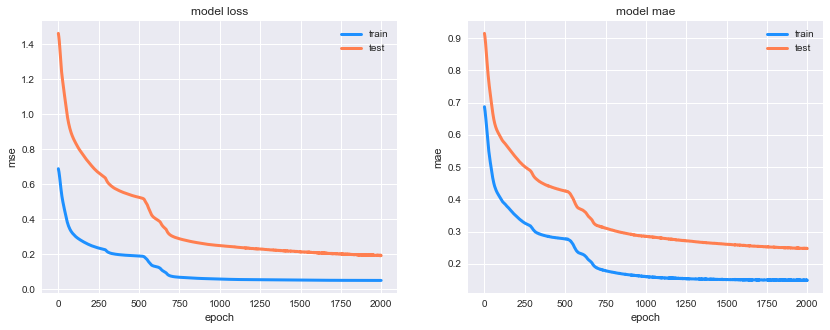

In [18]:
print(history.keys())

# 画出损失函数曲线
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(history['loss'], c='dodgerblue', lw=3)
plt.plot(history['val_loss'], c='coral', lw=3)
plt.title('model loss')
plt.ylabel('mse'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(122)
plt.plot(history['mae'], c='dodgerblue', lw=3)
plt.plot(history['val_mae'], c='coral', lw=3)
plt.title('model mae')
plt.ylabel('mae'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [19]:
# 读取模型
#print(len(X_train[4]))
autoencoder = load_model('SofaSofa_model.h5')
#pred=autoencoder.predict(X_test[0].reshape(1,29))
#print(pred)
#print(X_test[0].shape)
# 利用训练好的autoencoder重建测试集
pred_test = autoencoder.predict(X_test)
pred_fraud = autoencoder.predict(X_fraud)

# 计算还原误差MSE和MAE
mse_test = np.mean(np.power(X_test - pred_test, 2), axis=1)
mse_fraud = np.mean(np.power(X_fraud - pred_fraud, 2), axis=1)
mae_test = np.mean(np.abs(X_test - pred_test), axis=1)
mae_fraud = np.mean(np.abs(X_fraud - pred_fraud), axis=1)
mse_df = pd.DataFrame()
mse_df['Class'] = [0] * len(mse_test) + [1] * len(mse_fraud)
mse_df['MSE'] = np.hstack([mse_test, mse_fraud])
mse_df['MAE'] = np.hstack([mae_test, mae_fraud])
mse_df = mse_df.sample(frac=1).reset_index(drop=True)


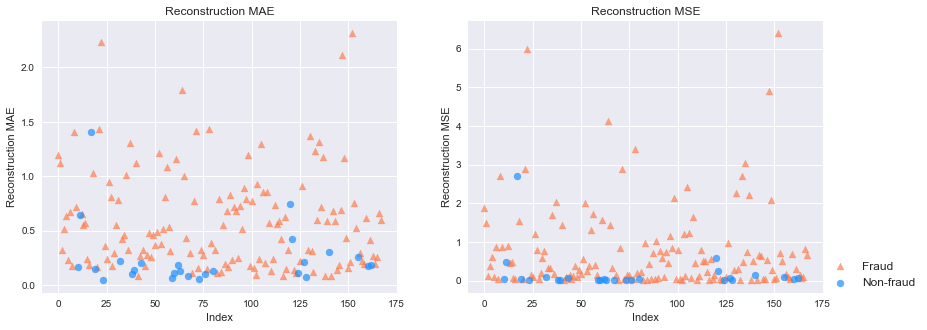

In [20]:
# 分别画出测试集中正样本和负样本的还原误差MAE和MSE
markers = ['o', '^']
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Non-fraud', 'Fraud']

plt.figure(figsize=(14, 5))
plt.subplot(121)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MAE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.title('Reconstruction MAE')
plt.ylabel('Reconstruction MAE'); plt.xlabel('Index')
plt.subplot(122)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0], fontsize=12); plt.title('Reconstruction MSE')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Index')
plt.show()

In [21]:
test_df = pd.DataFrame({'Test MSE': mse_test})
anormaly_df = pd.DataFrame({"Anormaly MSE": mse_fraud})
sum_test=test_df.describe()
sum_test['Anormaly MSE']=anormaly_df.describe()['Anormaly MSE']
display(sum_test)
print(['MAE','MSE'])

,Test MSE,Anormaly MSE
count,26.000000,142.000000
mean,0.191318,0.771753
std,0.534258,1.096907
min,0.003296,0.010691
25%,0.021072,0.084876
50%,0.044808,0.383823
75%,0.088203,0.871406
max,2.717168,6.395944


['MAE', 'MSE']


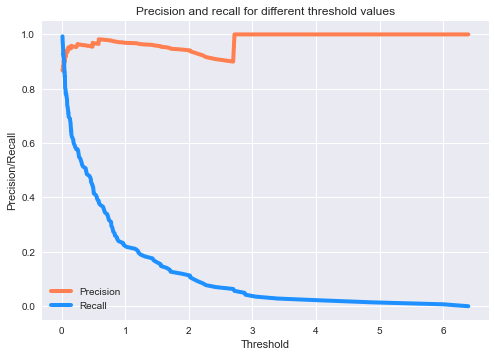

In [22]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(mse_df['Class'], mse_df['MSE'])

plt.plot(threshold_rt, precision_rt[1:], c='coral',label="Precision",linewidth=4)
plt.plot(threshold_rt, recall_rt[1:],c='dodgerblue', label="Recall",linewidth=4)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

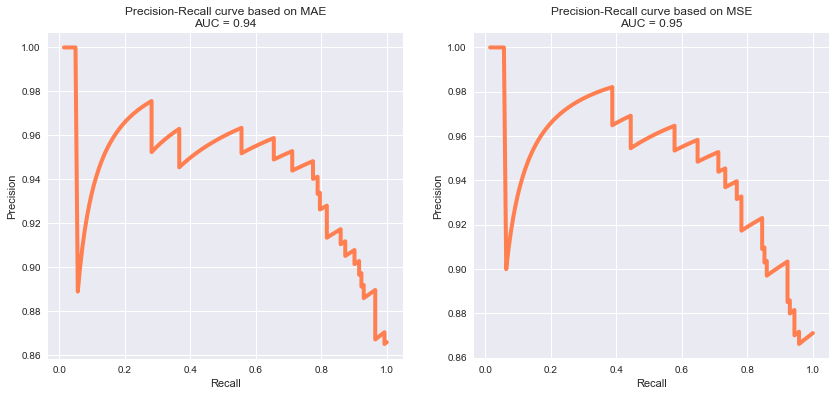

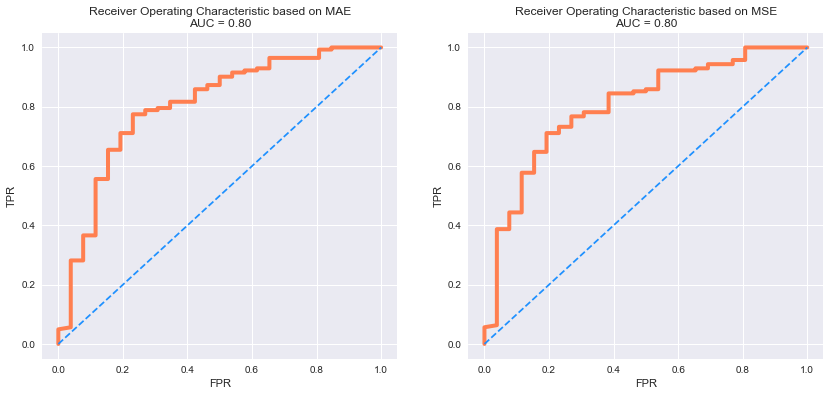

In [23]:
# 画出Precision-Recall曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    precision, recall, _ = precision_recall_curve(mse_df['Class'], mse_df[metric])
    pr_auc = auc(recall, precision)
    plt.title('Precision-Recall curve based on %s\nAUC = %0.2f'%(metric, pr_auc))
    plt.plot(recall[:-2], precision[:-2], c='coral', lw=4)
    plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()

# 画出ROC曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    fpr, tpr, _ = roc_curve(mse_df['Class'], mse_df[metric])
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic based on %s\nAUC = %0.2f'%(metric, roc_auc))
    plt.plot(fpr, tpr, c='coral', lw=4)
    plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
    plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

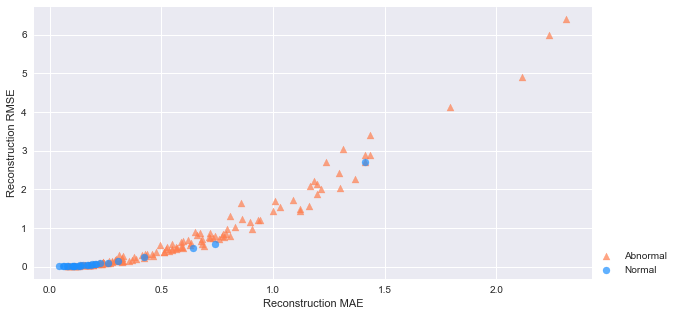

In [24]:
# 画出MSE、MAE散点图
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Normal', 'Abnormal']

plt.figure(figsize=(10, 5))
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp['MAE'], 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0])
plt.ylabel('Reconstruction RMSE'); plt.xlabel('Reconstruction MAE')
plt.show()

0.8690476190476191
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        26
           1       0.87      1.00      0.93       142

    accuracy                           0.87       168
   macro avg       0.93      0.58      0.60       168
weighted avg       0.89      0.87      0.83       168



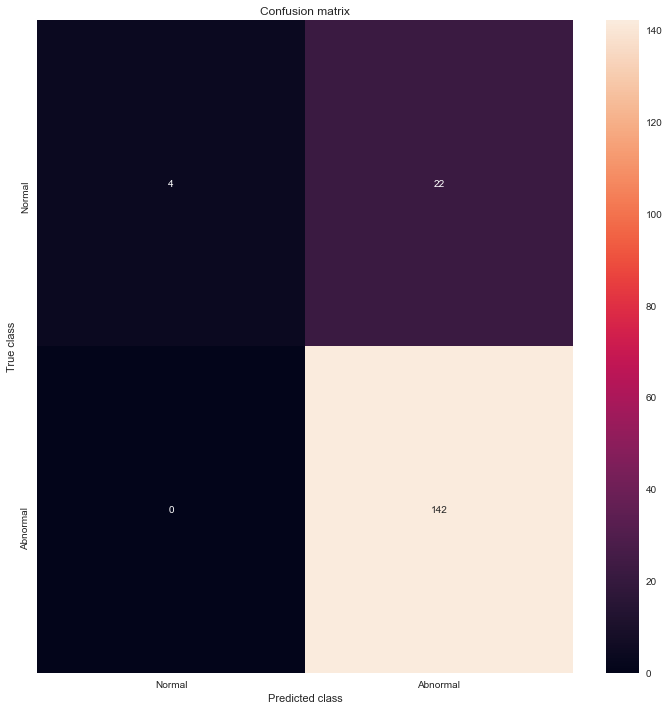

In [48]:
LABELS = ["Normal", "Abnormal"]
threshold_fixed = 0.01

pred_y = [1 if e > threshold_fixed else 0 for e in mse_df['MSE'].values]
conf_matrix = confusion_matrix(mse_df['Class'], pred_y)
accuracy=metrics.accuracy_score(mse_df['Class'],pred_y)
print(accuracy)
print(classification_report(mse_df['Class'], pred_y))
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()